In [69]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import tensorflow as tf
import csv
from tensorflow.python.client import timeline

import nltk
from nltk.wsd import lesk
from nltk.corpus import wordnet as wn
from collections import Counter
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
import numpy as np
import scipy.stats.stats as st
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.wsd import lesk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
#from stemming.porter2 import stem
from nltk import PorterStemmer
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
from string import digits
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Configuration Data

## Pathes

### Data Source

In [70]:
#path_data_source='/home/fsg/output_csv/'
path_data_source='/media/fsg/74C86089C8604C04/PHD/Softwares/ph/data_source/'
sub_path_data_source='/media/fsg/74C86089C8604C04/PHD/Softwares/ph/data_source/files/'

#path_data_source='./data/'

### Table Database

In [71]:

#path_database='./data/database/'
#path_database='/home/fsg/output_csv/database/'
path_database='/media/fsg/74C86089C8604C04/PHD/Softwares/ph/database/' 

### XML DataBase

In [72]:
path_XML_database='/media/fsg/74C86089C8604C04/PHD/Softwares/ph/database/XML/' 
path_freq_word_files=path_XML_database+"freq/word/"
path_freq_lesk_files=path_XML_database+"freq/lesk/"

## Data Source

In [6]:
data_source = 'cs.txt'


## Tables

#### Table Data Base

In [7]:
paragraph_table='paragraph_table.csv' 
paragraph_header_list=['uuid','paragraph','doc_id']

In [8]:
sentences_paragraph_table='sentences_paragraph_table.csv' 
sentences_paragraph_list=['uuid','uuid_paragraph','sentence']

In [9]:
word_sentences_table='word_sentences_table.csv' 
word_sentences_list=['uuid','uuid_paragraph','uuid_sentence','remaining_word','lesk','lesk_name','definition']

word_paragraph='word_paragraph.csv'
word_paragraph_list=['index','list of word','No. of paragraph']

lesk_paragraph='lesk_paragraph.csv'
lesk_paragraph_list=['index','list of lesk','No. of paragraph']

In [10]:
freq_word_table='freq_word_table.csv'
#freq_table_list=['uuid','uuid_paragraph','word','word_freq','lesk_name','lesk_Freq']
freq_lesk_table='freq_lesk_table.csv'

In [11]:
tf_idf_word_table='tf_idf_word_table.csv'
tf_idf_lesk_table='tf_idf_lesk_table.csv'
tf_idf_table='tf_idf_table.csv'
nmf_H_table='nmf_H_table.csv'
nmf_W_table='nmf_W_table.csv'

In [12]:
res_sem_sim_table='res_sem_sim_table.csv' #H



In [13]:
inv_res_sem_sim_table='inv_res_sem_sim_table.csv'
inv_res_sem_sim_threshold_correlation_coefficient_table='inv_res_sem_sim_threshold_correlation_coefficient_table.csv' #H
inv_res_sem_sim_permutaion_correlation_coefficient_table='inv_res_sem_sim_permutaion_correlation_coefficient_table.csv'

In [14]:
nmf_H_res_normal_table='nmf_H_res_normal_table.csv'
nmf_W_res_normal_table='nmf_W_res_normal_table.csv'

nmf_H_tfidf_word_normal_table='nmf_H_tfidf_word_normal_table.csv'
nmf_W_tfidf_word_normal_table='nmf_W_tfidf_word_normal_table.csv'

nmf_H_tfidf_lesk_normal_table='nmf_H_tfidf_lesk_normal_table.csv'
nmf_W_tfidf_lesk_normal_table='nmf_W_tfidf_lesk_normal_table.csv'

In [15]:
res_sem_sim_threshold_correlation_coefficient_table='res_sem_sim_threshold_correlation_coefficient_table.csv' #H
res_sem_sim_permutaion_correlation_coefficient_table='res_sem_sim_permutaion_correlation_coefficient_table.csv' #H
nmf_W_res_sem_sim_permutaion_correlation_coefficient_table='nmf_W_res_sem_sim_permutaion_correlation_coefficient_table.csv'
nmf_W_res_sem_sim_correlation_coefficient_table='nmf_W_res_sem_sim_correlation_coefficient_table.csv'
nmf_W_res_sem_sim_threshold_correlation_coefficient_table='nmf_W_res_sem_sim_threshold_correlation_coefficient_table.csv'

### XML Data Base

#### Reports

##### General Reports

In [16]:
res_counter_columns_not_equal_zero_table='res_counter_columns_not_equal_zero_table.csv'
res_counter_columns_equal_zero_table='res_counter_columns_equal_zero_table.csv'
res_counter_columns_less_than_one_table='res_counter_columns_less_than_one_table.csv'
res_thresholding_counter_columns_not_equal_zero_table='res_thresholding_counter_columns_not_equal_zero_table.csv'
res_permutaion_counter_columns_not_equal_zero_table='res_permutaion_counter_columns_not_equal_zero_table.csv'



In [17]:
H_tfidf_lesk_normal_counter_not_equal_zero_table='H_tfidf_lesk_normal_counter_not_equal_zero_table.csv'
W_tfidf_lesk_normal_counter_not_equal_zero_table='W_tfidf_lesk_normal_counter_not_equal_zero_table.csv'

H_res_sem_sim_permutaion_correlation_coefficient_counter_not_equal_zero_table='H_res_sem_sim_permutaion_correlation_coefficient_counter_not_equal_zero_table.csv'
W_res_sem_sim_permutaion_correlation_coefficient_counter_not_equal_zero_table='W_res_sem_sim_permutaion_correlation_coefficient_counter_not_equal_zero_table.csv'

H_res_sem_sim_correlation_coefficient_counter_not_equal_zero_table='H_res_sem_sim_correlation_coefficient_counter_not_equal_zero_table.csv'
nmf_W_res_sem_sim_correlation_coefficient_counter_not_equal_zero_table='nmf_W_res_sem_sim_correlation_coefficient_counter_not_equal_zero_table.csv'

H_res_sem_sim_threshold_correlation_coefficient_counter_not_equal_zero_table='H_res_sem_sim_threshold_correlation_coefficient_counter_not_equal_zero_table.csv'
nmf_W_res_sem_sim_threshold_correlation_coefficient_counter_not_equal_zero_table='nmf_W_res_sem_sim_threshold_correlation_coefficient_counter_not_equal_zero_table.csv'

##### Dimentionalty Reduction

In [18]:
dimentionalty_reduction_res_statistical_table='dimentionalty_reduction_res_statistical_table.csv'
dimentionalty_reduction_res_thresholding_table ='dimentionalty_reduction_res_thresholding_table.csv'
dimentionalty_reduction_res_sem_sim_permutaion_table='dimentionalty_reduction_res_sem_sim_permutaion_table.csv'
dimentionalty_reduction_res_sem_sim_H_table='dimentionalty_reduction_res_sem_sim_H_table.csv'
dimentionalty_reduction_res_sem_sim_W_table='dimentionalty_reduction_res_sem_sim_W_table.csv'


# Configuration session

In [19]:
config = tf.ConfigProto(device_count={"CPU": 7},
                        allow_soft_placement=True,
                        inter_op_parallelism_threads=1,
                        intra_op_parallelism_threads=1,
                        use_per_session_threads=True)


'''config = tf.ConfigProto(device_count={"GPU": 4,"CPU":32},
                        allow_soft_placement=True,
                        inter_op_parallelism_threads=1,
                        intra_op_parallelism_threads=1,
                        use_per_session_threads=True)'''

'config = tf.ConfigProto(device_count={"GPU": 4,"CPU":32},\n                        allow_soft_placement=True,\n                        inter_op_parallelism_threads=1,\n                        intra_op_parallelism_threads=1,\n                        use_per_session_threads=True)'

# Generic function

## Write data to csv

In [20]:
'''
Write Excell sheet
'''
def save_file_to_database(data_rows,path_database,file_databbase,header_list):
    outfile = open(path_database+file_databbase,'w')
    writer=csv.writer(outfile)
    #header_list=['uuid','paragraph','doc_id']
    i=0
    for line in data_rows:
        row=[i,line,'paragraph no.'+str(i)]
        if i==0:
            
            writer.writerow(header_list)
            writer.writerow(row)
        else:
            #print('ff')
            writer.writerow(row)
        i+= 1
        #outfile.close()
            

## Read data from csv

In [21]:
'''
Read Excell sheet
'''
def read_text_from_database(path_database,file_databbase):
    queue_paragraph=[]
    #f = open(sys.argv[1], 'rt')
    outfile = open(path_database+file_databbase,'rt')
    try:
                
        reader=csv.reader(outfile)
        for row in reader:
            queue_paragraph.append(row)
            #print (row)
    finally:
        print ("row")
        outfile.close()
        
    return queue_paragraph
    

In [22]:
def read_cvs_by_pands(path_database,file_databbase,index_col, header):
    return pd.read_csv(path_database+file_databbase,index_col=index_col,header=header)

#read_cvs_by_pands(path_database,paragraph_table,index_col=0,header=0)

In [23]:
def write_cvs_by_pands(path_database,file_databbase,header,data_rows):
    csv_df=pd.DataFrame(data_rows,columns=header ) 
    csv_df.to_csv(path_database+file_databbase)

    

#write_cvs_by_pands(path_database,sentences_paragraph_table,sentences_paragraph_list,sales)

In [39]:
#save pragraphs to files
def write_file(pragraph,num_pragraph,path):
    file = open(path+str(num_pragraph)+".txt","w") 
 
    file.write(pragraph) 
    
    file.close() 
    

In [40]:
#create sub dataset
def sub_dataset(path_data_source,data_source):
    pragraphs=txt_pragraphs(read_file(path_data_source+data_source))
    counter=0
    for pragraph in pragraphs:
        print('pragraph no ',counter)
        write_file(pragraph,counter,sub_path_data_source)
        counter +=1
    

In [41]:
sub_dataset(path_data_source,data_source)

pragraph no  0
pragraph no  1
pragraph no  2
pragraph no  3
pragraph no  4
pragraph no  5
pragraph no  6


In [104]:
#https://stackoverflow.com/questions/36021526/converting-an-array-dict-to-xml-in-python


def dic_to_xml(dic,custom_root,path_freq_word_files,name_file):
    from dicttoxml import dicttoxml
    xml = dicttoxml(dic, custom_root=custom_root, attr_type=False)
    print(xml)

    file = open(path_freq_word_files+name_file+".xml","wb") 
 
    file.write(xml)
    
    file.close() 

    
dictionary = {
    'time': {"hourss":"1", "minute":"30","seconds": "40"},
    'place': {"street":"40 something", "zip": "00000"}
}    

dictionary2 = {
    "hourss":"1", "minute":"30","seconds": "40"}

dic_to_xml(dictionary2,'words',path_freq_word_files,'name_file')

b'<?xml version="1.0" encoding="UTF-8" ?><words><hourss>1</hourss><seconds>40</seconds><minute>30</minute></words>'


# Pre processing pipeline

## Read Huge File

In [24]:
def read_file(str):
    file = open(str,'r')
    txt=file.read()
    #print(txt)
    return txt

In [25]:
def read_bz():
    #https://codeyarns.com/2013/06/03/how-to-read-a-text-file-compressed-using-bzip2-in-python/
    import bz2
    bz_file = bz2.BZ2File("/media/fsg/74C86089C8604C04/PHD/Dataset/wiki.bz2")
    line_list = bz_file.readlines()



## Split Document to pragraphs

In [26]:
def txt_pragraphs(str):
    pragraphs = str.split("\n\n")
    return pragraphs
#pragraphs=txt_pragraphs(txt)
#type(pragraphs)

pragraph no  0
pragraph no  1
pragraph no  2
pragraph no  3
pragraph no  4
pragraph no  5
pragraph no  6


## Save paragraphs in excel 

In [26]:
save_file_to_database(txt_pragraphs(read_file(path_data_source+data_source)),path_database,paragraph_table,paragraph_header_list)

## Split Paragraph to Sentences

In [27]:
def pragraph_to_setnences(str):
    return sent_tokenize(str)
#setnences=pragraph_to_setnences(pragraphs[n_pragraph])

## Word Process For Sentence

### Removing English stopwords and Punct per Sentence

In [28]:
new_stop_words = ['the', 'that', 'to', 'as', 'there', 'has', 'and', 'or', 'is', 'not', 'a', 'of', 'but', 'in', 'by', 'on', 'are', 'it', 'if','what','where','how','when']
new_stop_words2=['--','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now','even','until','then','must']
numbers=[1,2,3,4,5,6,7,8,9]
#stemmer = SnowballStemmer("english", ignore_stopwords=True)
def remove_stopword_sentences(str):
    tokenizer = RegexpTokenizer("[\w']+")
    
    words=tokenizer.tokenize(str)
    
    english_stops = set(stopwords.words('english'))
    stems=[]
    list_word=[word for word in words if word.lower() not in english_stops and word.lower() not in new_stop_words and word.lower() not in new_stop_words2 and  not word.lower().isdigit() and word.lower() not in digits and word.lower() not in  numbers]
    
    for word in list_word:
        #stems.append(stem(word))
        #stems.append(PorterStemmer().stem(word))
        #stems.append(stemmer.stem(word))
        #stems.append(stemmer.stem("computer"))
        stems.append(word)
    
    return stems#(stem(setem_word for setem_word in  ([word for word in words if word not in english_stops and word not in new_stop_words])))

In [29]:
paragraph_list=read_text_from_database(path_database,paragraph_table)

row


In [30]:
def word_list_sentece(pragraph):
    words_list=[]
    setnences=pragraph_to_setnences(pragraph)
    for indexs in range(len(setnences)):    
        #print("Sentence No. ",indexs,": ",setnences[indexs],"\n")
        words=remove_stopword_sentences(setnences[indexs])
        wordsent=''
        for index in range(len(words)):
            wordsent+=' '+words[index]
            #print("wordsent:",wordsent)
            
        words_list.append(wordsent)
        #count = Counter(words)
        #print("wordsent:",wordsent)
        #print(" word:",words)
    print(words_list)
    return words_list

#corpus=word_list_sentece(pragraphs[0])

## Word Sense Disambiguation (WSD): LESK per Sentence

Given an ambiguous word and the context in which the word occurs, Lesk returns a Synset with the highest number of overlapping words between the context sentence and different definitions from each Synset.


In [31]:

'''
this function for compute lesk for each word(list of word) in sentence
'''
def lesk_words_sentence(words,sentence):
    lesks= []
    for word in words:
        if lesk(sentence,word, 'n') is not None:
            lesks.append(lesk(sentence,word, 'n'))
            #print("Word is: ",word,"\n LESK: ",lesk(sentence,word, 'n'),"\n Sentence: ",sentence )
        
    return lesks

In [32]:
'''
this function for compute lesk of word in sentence
'''

def lesk_word_sentence(sentence,word):
    from nltk.wsd import lesk
    lesk_synset=''
    #lesks= []
    #for word in words:
    #disambiguated=lesk(context_sentence=sentence, ambiguous_word=word)
    disambiguated=lesk(sentence,word, 'n')
    #print(disambiguated)
    #if disambiguated is not None:
    lesk_synset=disambiguated
    #else:
    #lesk_synset=0
    #print("Word is: ",word,"\n LESK: ",lesk(sentence,word, 'n'),"\n Sentence: ",sentence )
        
    return lesk_synset

#lesk("Computer science is a discipline that spans theory and practice","science")

#sent = 'people should be able to marry a person of their choice'.split()
#lesk(sent, 'able')

## Calculating WordNet Synset similarity using information content

In [33]:
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic as wnic
from nltk.tokenize import word_tokenize

def similarity_by_infocontent(sense1, sense2, option):
    #sense1="Synset('"+sense1+"')"
    #sense2="Synset('"+sense2+"')"
    sense1 = wn.synset(sense1)
    sense2 = wn.synset(sense2)
    print(sense1,sense2)
    """ Returns similarity scores by information content. """
    #if sense1.pos != sense2.pos: # infocontent sim can't do diff POS.
        #return 0

    info_contents = ['ic-bnc-add1.dat', 'ic-bnc-resnik-add1.dat', 
                     'ic-bnc-resnik.dat', 'ic-bnc.dat', 

                     'ic-brown-add1.dat', 'ic-brown-resnik-add1.dat', 
                     'ic-brown-resnik.dat', 'ic-brown.dat', 

                     'ic-semcor-add1.dat', 'ic-semcor.dat',

                     'ic-semcorraw-add1.dat', 'ic-semcorraw-resnik-add1.dat', 
                     'ic-semcorraw-resnik.dat', 'ic-semcorraw.dat', 

                     'ic-shaks-add1.dat', 'ic-shaks-resnik.dat', 
                     'ic-shaks-resnink-add1.dat', 'ic-shaks.dat', 

                     'ic-treebank-add1.dat', 'ic-treebank-resnik-add1.dat', 
                     'ic-treebank-resnik.dat', 'ic-treebank.dat']

    if option in ['res', 'resnik']:
        #return wn.res_similarity(sense1, sense2, wnic.ic('ic-bnc-resnik-add1.dat'))
        #print('simRe snik (c1,c2) = -log p(lso(c1,c2)) = IC(lso(c1,c2)')
        return wn.res_similarity(sense1, sense2, wnic.ic('ic-treebank-resnik-add1.dat'))
    #return min(wn.res_similarity(sense1, sense2, wnic.ic(ic)) \
    #             for ic in info_contents)

    elif option in ['jcn', "jiang-conrath"]:
        #return wn.jcn_similarity(sense1, sense2, wnic.ic('ic-bnc-add1.dat'))
        #print('sim(jcn) (c1,c2 )= (IC(c1) + IC(c2 )) - 2IC(lso(c1,c2 ))')
        return wn.jcn_similarity(sense1, sense2, wnic.ic('ic-treebank.dat'))

    elif option in ['lin']:
        #return wn.lin_similarity(sense1, sense2, wnic.ic('ic-bnc-add1.dat'))
        #print('sim(lin) (c1,c2)=(2IC(lso(c1,c2 )))/(IC(c1)+IC(c2))')
        return wn.lin_similarity(sense1, sense2, wnic.ic('ic-treebank.dat'))

def sim(sense1, sense2, option="path"):
    """ Calculates similarity based on user's choice. """
    option = option.lower()
    if option.lower() in ["path", "path_similarity", 
                        "wup", "wupa", "wu-palmer", "wu-palmer",
                        'lch', "leacock-chordorow"]:
        return similarity_by_path(sense1, sense2, option) 
    elif option.lower() in ["res", "resnik",
                          "jcn","jiang-conrath",
                          "lin"]:
        return similarity_by_infocontent(sense1, sense2, option)

def max_similarity(context_sentence, ambiguous_word, option="path", 
                   pos=None, best=True):
    """
    Perform WSD by maximizing the sum of maximum similarity between possible 
    synsets of all words in the context sentence and the possible synsets of the 
    ambiguous words (see http://goo.gl/XMq2BI):
    {argmax}_{synset(a)}(\sum_{i}^{n}{{max}_{synset(i)}(sim(i,a))}
    """
    result = {}
    for i in wn.synsets(ambiguous_word):
        try:
            if pos and pos != str(i.pos()):
                continue
        except:
            if pos and pos != str(i.pos):
                continue
        result[i] = sum(max([sim(i,k,option) for k in wn.synsets(j)]+[0]) \
                        for j in word_tokenize(context_sentence))

    if option in ["res","resnik"]: # lower score = more similar
        result = sorted([(v,k) for k,v in result.items()])
    else: # higher score = more similar
        result = sorted([(v,k) for k,v in result.items()],reverse=True)
    #print (result)
    if best: return result[0][1];
    return result

In [34]:
#similarity_by_infocontent('able.s.04','able.s.04','res')

#sim2=wn.jcn_similarity(wn.synset('able.s.04'),wn.synset('able.s.04'),'ic-treebank-resnik-add1.data')
#sim2
#wn.synset('able.s.04').res_similarity(wn.synset('able.s.04'), 'ic-treebank-resnik-add1.data')

#wn.res_similarity(wn.synset('able.n.04'), wn.synset('adept.n.01'), wnic.ic('ic-treebank-resnik-add1.dat'))


sense1 = wn.synset('ace.n.03')
sense2 = wn.synset('acquiring.n.01')
print(sense1,sense2)
wn.res_similarity(sense1,sense2,wnic.ic('ic-treebank-resnik-add1.dat'))

Synset('ace.n.03') Synset('acquiring.n.01')


-0.0

## Simlarty per Words for Sentence

In [35]:
'''
calculate simantic simelart for Dimensionality reduction vector
say vector is n element [n1,n2,n3,.....nm], data frame row=n,col=n
sim(n[row],n[col])if if row != col:
option is sim method like res,lin,jcn ...... for IC

'''
#print(type(tfidf_feature_names))
#tfidf_feature_names

def sim_docs_lesk(df_freq,option):
    
    series=list(df_freq)#pd.Series(data=lesk_vec)
    #series.drop_duplicates()
    synset_lesk_noDuplicates= series#.tolist()    
    #df_all_synset_lesk = pd.DataFrame(index=series, columns=series )
    df_all_synset_lesk = pd.DataFrame(columns=series )
    #print ("synset_lesk_noDuplicates",len(synset_lesk_noDuplicates))
    
    for row in range(len(synset_lesk_noDuplicates)):
        try:
            data_row=[]
            for col in range(len(synset_lesk_noDuplicates)):

                    #if row < col:

                    sim=similarity_by_infocontent(series[row],series[col],option)
                    if sim is not None:
                        data_row.append(sim)
                    else:
                        data_row.append(0)
                        #print(len(data_row))


                    #else:

                        #data_row.append(0)
                        #print(len(data_row))

            #print(series[row])
            df_all_synset_lesk.loc[series[row]]=data_row
        except  Exception as inst:
                data_row.append(0)
                print(type(inst))    # the exception instance
                print(inst.args)     # arguments stored in .args
                print(inst)          # __str__ allows args to be printed directly,
                pass
                #print("Ex")
    return df_all_synset_lesk



In [36]:
#with tf.control_dependencies(paragraph_list):
        
        
with tf.Session(config=config) as sess:
        index_paragraph=0
        col=1
        sentences_paragraph_list_data=[]
        index_paragraph_list=[]
        paragraph_word_list=[]
        index_paragraph_list_name=[]
        
        
        all_w=[]
        all_sent=[]
        all_p_w=[]
        df=pd.DataFrame()
        frames =[]
        all_w_lesk=[]
        all_sent_lesk=[]
        all_p_w_lesk=[]
        df_lesk=pd.DataFrame()
        frames_lesk =[]
        frames_tfidf_lesk=[]
        texts = []
        texts_lesk=[]
        
        
        word_sentences_list_data=[]
        for paragraph in paragraph_list: #get pragraphs(documents) from DB
            #print("Pragraph  ",paragraph)
            p_w=[]
            p_w_lesk=[]
            all_p_w.append(p_w)
            all_p_w_lesk.append(p_w_lesk)   
            
            paragraph_word=[]
            paragraph_lesk=[]
            index_sentence=0
            index_paragraph_list.append(index_paragraph)
            index_paragraph_list_name.append('paragraph '+str(index_paragraph))
            if index_paragraph ==0:
                index_paragraph += 1
            else:
                #print(paragraph[col])
                setnences=pragraph_to_setnences(paragraph[col])#partitions paragraph to sentence
                #print(type(setnences))
                word_sentence=[]
                #word_sentences_list_data=[]#fatma
                words_pragraph='' #for tfidf word
                words_pragraph_lesk='' #for tfidf lesk
                for setnence in setnences:
                    #print("  ",setnence)
                    
                   
                    index_word=0
                    sentence_list=[]
                    
                    
                    sentence_list.append(index_sentence)
                    sentence_list.append(index_paragraph)
                    
                    
                    sentence_list.append(setnence)
                    sentences_paragraph_list_data.append(sentence_list)
                    
                    
                    words=remove_stopword_sentences(setnence)#remove stop words and noise
                    
                    
                    
                    for word in words:
                        
                        p_w.append(word)
                        all_w.append(word)
                        words_pragraph+=' '+"'"+word+"'" #for tfidf word
                                          
                        word_sentence.append(word)
                        lesk=lesk_word_sentence(setnence,word)#get LESK of word in sentence
                        
                        paragraph_word.append(word_sentence)
                        
                        if lesk is not None:
                            word_list=[]
                            word_list.append(index_word)
                            word_list.append(index_paragraph)#uuid_paragraph
                            word_list.append(index_sentence)
                            word_list.append(word)                                       
                            word_list.append(lesk)
                            word_list.append(lesk.name())#lemmas())
                            word_list.append(lesk.definition())
                            word_sentences_list_data.append(word_list)  
                            
                            p_w_lesk.append(lesk.name())
                            
                            all_w_lesk.append(lesk.name())
                            
                            paragraph_lesk.append(lesk.name())
                            
                            words_pragraph_lesk+=' '+"'"+lesk.name()+"'" #for tfidf lesk
                            
                            index_word += 1
                        else:
                            word_list=[]
                            word_list.append(index_word)
                            word_list.append(index_paragraph)#uuid_paragraph
                            word_list.append(index_sentence)
                            word_list.append(word)                                     
                            word_list.append('None')
                            word_list.append('None')#lemmas())
                            word_list.append('None')
                            word_sentences_list_data.append(word_list) 
                            
                            p_w_lesk.append('None')
                            
                            #all_w_lesk.append('None') for CountVectorizer
                            
                            paragraph_lesk.append("None")
                            
                            index_word += 1   
                            '''////////////////END word////////////////# '''
                    
                    index_sentence += 1
                    '''////////////////END Sentence////////////////# '''
                    all_sent.append(p_w)
                    all_sent_lesk.append(p_w_lesk)
                
                texts.append(words_pragraph) #for Tf-Idf word
                texts_lesk.append(words_pragraph_lesk) #for Tf-Idf lesk
                
                cv = CountVectorizer()
                cv_fit=cv.fit_transform(all_w).toarray()
                term_matrix_freq=pd.DataFrame(index=cv.get_feature_names())
                term_matrix_freq["paragraph"+str(index_paragraph)]=np.sum(cv_fit, axis=0)   
                frames.append(term_matrix_freq)
                #df = pd.concat(frames, axis=1)
                
                
                
                cv_lesk = CountVectorizer(token_pattern='(?u)\\b\\w\\w+\\b\\.\\w\\.\\d\\d')
                cv_fit_lesk=cv_lesk.fit_transform(all_w_lesk).toarray()
                term_matrix_freq_lesk=pd.DataFrame(index=cv_lesk.get_feature_names())
                term_matrix_freq_lesk["paragraph"+str(index_paragraph)]=np.sum(cv_fit_lesk, axis=0)   
                frames_lesk.append(term_matrix_freq_lesk)
                #df_lesk = pd.concat(frames_lesk, axis=1)
                
                write_cvs_by_pands(path_database,word_sentences_table,word_sentences_list,word_sentences_list_data)
                
                paragraph_word_list.append(paragraph_lesk)
                    
                index_paragraph += 1
                '''////////////////END PARAGRAPH////////////////# '''
        
        write_cvs_by_pands(path_database,sentences_paragraph_table,sentences_paragraph_list,sentences_paragraph_list_data)
        
        #CountVectorizer tables
        #word
        df = pd.concat(frames, axis=1)#word
        df.replace(np.nan, 0, inplace=True)
        df.T.to_csv(path_database+freq_word_table)
        #lesk
        df_lesk = pd.concat(frames_lesk, axis=1)#lesk
        df_lesk.replace(np.nan, 0, inplace=True)
        df_lesk.T.to_csv(path_database+freq_lesk_table) 
       
        #Tf-idf word tables
        cv_tfidf = TfidfVectorizer(analyzer='word')#word        
        cv_tfidf_fit=cv_tfidf.fit_transform(texts).toarray()
        df_tfidf=pd.DataFrame(cv_tfidf_fit,columns=cv_tfidf.get_feature_names())
        df_tfidf.to_csv(path_database+tf_idf_word_table)
        print(len(texts))
        save_file_to_database(texts,path_database,word_paragraph,word_paragraph_list)
        
        
        
        word_feature_array = np.array(cv_tfidf.get_feature_names())
        word_tfif_sorting = np.argsort(cv_tfidf_fit).flatten()[::-1]

        n = 10
        top_n_word = word_feature_array[word_tfif_sorting][:n]
        print(top_n_word)
        
        #tf-idf lesk tables
        cv_tfidf_lesk = TfidfVectorizer(analyzer='word',token_pattern='(?u)\\b\\w\\w+\\b\\.\\w\\.\\d\\d') #lesk
        print(type(texts_lesk))
        cv_tfidf_fit_lesk=cv_tfidf_lesk.fit_transform(texts_lesk).toarray()
        df_tfidf_lesk=pd.DataFrame(cv_tfidf_fit_lesk,columns=cv_tfidf_lesk.get_feature_names())
        df_tfidf_lesk.to_csv(path_database+tf_idf_lesk_table)
        save_file_to_database(texts_lesk,path_database,lesk_paragraph,lesk_paragraph_list)
        
        lesk_feature_array = np.array(cv_tfidf_lesk.get_feature_names())
        lesk_tfif_sorting = np.argsort(cv_tfidf_fit_lesk).flatten()[::-1]

        n = 10
        top_n_lesk = lesk_feature_array[lesk_tfif_sorting][:n]
        print(top_n_lesk)
        
        #calculate semantic semlarty by res
        #df_sim_sem_lesk=sim_docs_lesk(cv_tfidf_lesk.get_feature_names(),'res')
        #df_sim_sem_lesk.to_csv(path_database+res_sem_sim_table)
        

7
['within' 'software' 'methods' 'science' 'used' 'new' 'important'
 'principles' 'design' 'computer']
<class 'list'>
['method.n.01' 'science.n.01' 'software.n.01' 'use.n.03' 'principle.n.04'
 'design.n.06' 'computer.n.01' 'psychoanalysis.n.01' 'engineering.n.03'
 'spirit.n.02']


# NMF Traditional

In [37]:
from sklearn.decomposition import NMF

## Traditional NMF using sklearn

In [38]:
n_topics = 10
n_top_words = 20
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    
#print_top_words(nmf, tfidf_feature_names, n_top_words)


In [39]:
'''
df_data is TF-IDF  to get H and W by default way

'''

def nmf_normal(df_data,path_database,nmf_H_normal_table,nmf_W_normal_table):
    #https://de.dariah.eu/tatom/topic_model_python.html

    nmf = NMF()
    doctopic = nmf.fit_transform(df_data)# W
   
    print(type(doctopic))
    topic_word_matrix = []
    document_topic_matrix = []
    vocabulary_size = len(df_data.columns)

    row = []
    col = []
    data = []
    data_rows=[]
    topic_name=[]
    tfidf_feature_names =df_data.columns #tfidf_vectorizer.get_feature_names()

    for topic_idx, topic in enumerate(nmf.components_):#word topic H
    
        topic_row=[]
        topic_arg_sort=topic.argsort()
        for i in range(len(topic_arg_sort)):
            row.append(topic_idx)
            col.append(i)
            data.append(topic[i])
            topic_row.append(round(topic[i],4))
            #print(topic[0])
        data_rows.append(topic_row)
        #topic_name.append('Topic_no_'+str(topic_idx))
        topic_name.append(tfidf_feature_names[topic_idx])
        #print('Topic',tfidf_feature_names[topic_idx],'\n')
        
        
    df_word_topic=pd.DataFrame(data_rows,columns=tfidf_feature_names,index=topic_name)

    df_word_topic.to_csv(path_database+nmf_H_normal_table)
    
    
    

#word topic W

    pragraphs_names = read_cvs_by_pands(path_database,paragraph_table,index_col=2,header=0)['uuid']#['doc_id']
    
    
    doctopic_orig = doctopic.copy()
    num_groups = len(set(pragraphs_names))
    
    doctopic_grouped = np.zeros((num_groups, len(doctopic[0])))
   
    for i, name in enumerate(sorted(set(pragraphs_names))):
        #print(doctopic[pragraphs_names == name, :])
        #print(np.mean(doctopic[pragraphs_names == name, :], axis=0))
        doctopic_grouped[i, :] = doctopic[pragraphs_names == name, :] #np.mean(doctopic[pragraphs_names == name, :], axis=0)
    
    doctopic = doctopic_grouped

    df_doc_topic=pd.DataFrame(doctopic,columns=topic_name,index=pragraphs_names)

    df_doc_topic.to_csv(path_database+nmf_W_normal_table)
    
    
    
    
    


In [40]:
'''
get nmf for tfidf of lesk

'''

tf_idf_lesk_df=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)
nmf_normal(tf_idf_lesk_df,path_database,nmf_H_tfidf_lesk_normal_table,nmf_W_tfidf_lesk_normal_table)

<class 'numpy.ndarray'>


In [41]:
'''
get nmf for tfidf of word

'''

tf_idf_word_df=read_cvs_by_pands(path_database,tf_idf_word_table,index_col=0,header=0)
nmf_normal(tf_idf_word_df,path_database,nmf_H_tfidf_word_normal_table,nmf_W_tfidf_word_normal_table)

<class 'numpy.ndarray'>


## New MNF

### Matrix1:Thresholding Correlation-Coefficient matrix

    Edit each value in Correlation-Coefficient matrix less than 1 become zero.
    Edit diagonal cells to become 1 


In [42]:
def threshold_correlation_coefficient(res_cor_coeff,path_database,threshold_correlation_coefficient_table):

    cols=res_cor_coeff.index.get_values()
    res_cor_coeff_greter_one=[]
    for col in cols:
        topic_liist=[]
        topic_value=[]
        for index in range(len(cols)):
            #if res_cor_coeff[col][index]==res_cor_coeff[col].max():# to make duiagonal matrix by one
                #topic_value.append(1)
                #topic_value.append(res_cor_coeff[col][index])
            #else:
            if res_cor_coeff[col][index]>=1:
                topic_value.append(res_cor_coeff[col][index])
            else:
                topic_value.append(0)
        res_cor_coeff_greter_one.append(topic_value)

    df_res_cor_coeff_greter_one = pd.DataFrame(res_cor_coeff_greter_one,index=res_cor_coeff.index.get_values(),columns=res_cor_coeff.index.get_values() )
    df_res_cor_coeff_greter_one.to_csv(path_database+res_sem_sim_threshold_correlation_coefficient_table)
    #return df_res_cor_coeff_greter_one

In [43]:
threshold_correlation_coefficient(read_cvs_by_pands(path_database,res_sem_sim_table,index_col=0,header=0),path_database,res_sem_sim_threshold_correlation_coefficient_table)

### Matrix2:subset_correlation_coefficient:
        sort (assending=false) matrix1 by value of current cluster(topic=column name).
remove matrix1 rows have zero value in currnet cluster.
remove column matrix1 to become rows = column (square matrix).


In [44]:
def cor_coeff_subSet(df_threshold_correlation_coefficient,col):
    #Sort data frame by list
    df_threshold_correlation_coefficient = df_threshold_correlation_coefficient.sort_values(col, ascending=False)
    #select list greter than zero
    topic_word_list=np.sort(df_threshold_correlation_coefficient[df_threshold_correlation_coefficient[col]!=0][col])
    #subset dataframe by row , to get only row of this dataframe for this list greaterthan zero

    df_res_cor_coeff_subSet=df_threshold_correlation_coefficient[0:len(topic_word_list)]
    rows_subSet=df_res_cor_coeff_subSet.index.get_values()
    #Subset Dataframe by column
    df_res_cor_coeff_subSet_cols=df_res_cor_coeff_subSet[rows_subSet]

    return df_res_cor_coeff_subSet_cols#.sort_values(col, ascending=False)
#df_res_cor_coeff_subSet_cols['ace.n.03']

### Matrix3:permutaion_subset_correlation_coefficient:

 check value in other column(excpet topic column) if this value =0 check value in topic colmn for row and column 
 keep the gretest value and remove small 


In [45]:
def permutaion_subset_correlation_coefficient(df_res_cor_coeff_subSet_cols,cluster_name):
    cols=df_res_cor_coeff_subSet_cols.index.get_values()
    #print(df_res_cor_coeff_subSet_cols[cluster_name][cluster_name])
    rejected_cluster_keyword_list=[]
    rejected_cluster_keyword_list_value=[]
    for col in cols:
        if col!=cluster_name:
            for row in cols:
                if df_res_cor_coeff_subSet_cols[col][row]==0:

                    c=df_res_cor_coeff_subSet_cols[cluster_name][col]
                    r=df_res_cor_coeff_subSet_cols[cluster_name][row]
                    #print("col :",col,"row :",row,'Col',c,'Row',r,"\n")
                    if c>r:
                        if row not in rejected_cluster_keyword_list:
                            rejected_cluster_keyword_list.append(row)
                            rejected_cluster_keyword_list_value.append(r)
                    else:
                        if col not in rejected_cluster_keyword_list:
                            rejected_cluster_keyword_list.append(col)
                            rejected_cluster_keyword_list_value.append(c)


    #print(len(rejected_cluster_keyword_list))

    #cols.drop(rejected_cluster_keyword_list)
    # = np.delete(cols, rejected_cluster_keyword_list)
    cols_list=cols.tolist()
    #x2=rejected_cluster_keyword_list.tolist()
    #x1.remove(rejected_cluster_keyword_list)
    for i in rejected_cluster_keyword_list:
        cols_list.remove(i)
    #print(cols_list)
    df_res_cor_coeff_subSet_cols = df_res_cor_coeff_subSet_cols.sort_values(col, ascending=False)
    df_new_res_cor_coeff_subSet=df_res_cor_coeff_subSet_cols[0:len(cols_list)]#[cols_list][cols_list]
    
    return df_new_res_cor_coeff_subSet[cols_list]#['ace.n.03']

In [46]:
'''
calculate res_sim agin for all topics(coulmn) after permutaion_correlation_coefficient
'''

def permutaion_correlation_coefficient(path_database,res_sem_sim_threshold_correlation_coefficient_table):
    df_threshold_correlation_coefficient=read_cvs_by_pands(path_database,res_sem_sim_threshold_correlation_coefficient_table,index_col=0,header=0)
    cols=df_threshold_correlation_coefficient.columns
    frames=[]

    for i in range(len(df_threshold_correlation_coefficient.columns)):
    
        cluster_name=df_threshold_correlation_coefficient.columns[i]
        #pint(cluster_name)
        col=df_threshold_correlation_coefficient[cluster_name]
        df_res_cor_coeff_subSet_cols=cor_coeff_subSet(df_threshold_correlation_coefficient,cluster_name)
        df_permutaion_subset_correlation_coefficient=permutaion_subset_correlation_coefficient(df_res_cor_coeff_subSet_cols,cluster_name)
        df_demo=pd.DataFrame(df_permutaion_subset_correlation_coefficient[cluster_name])
        frames.append(df_demo)
        df = pd.concat(frames, axis=1)
        df.replace(np.nan, 0, inplace=True)
        df.T.to_csv(path_database+res_sem_sim_permutaion_correlation_coefficient_table)#topic is row and words is coulumn


In [47]:
permutaion_correlation_coefficient(path_database,res_sem_sim_threshold_correlation_coefficient_table)

In [147]:
'''
treat Singularty by SDV to invert
'''
def df_inverse(df,path_database,name_table):
    import numpy as np 
    
    a = np.array(df.values)
    det=np.linalg.det(a)
    
    
    if det==0:
        u,s,v=np.linalg.svd(a)
        ainv=np.dot(v,np.dot(np.diag(s**-1),u.transpose()))
        
        #print ("Singular!")
    else:
        ainv =np.linalg.inv(a)#normal
        #print ("Not Singular!") 
    
    df_inv = pd.DataFrame(ainv, df.columns, df.index)
    df_inv.to_csv(path_database+name_table)
    
    return df_inv

In [148]:
df_H=read_cvs_by_pands(path_database,res_sem_sim_permutaion_correlation_coefficient_table,index_col=0,header=0)
df_inverse(df_H,path_database,'yyyyy.csv')

,ace.n.03,acquiring.n.01,algorithm.n.01,automaton.n.02,beginning.n.05,bind.n.01,broad.n.01,building.n.04,business.n.04,calculation.n.02,...,view.n.02,view.n.07,way.n.12,well.n.05,whitethorn.n.01,wish.n.01,workplace.n.01,world.n.02,world.n.08,young.n.04
ace.n.03,-0.013956,0.024652,0.001612,3.499991e+10,0.026680,-0.039590,1.932553e+12,0.017563,0.020010,0.143145,...,-0.019471,-0.012649,1.569906e-04,3.718513e+10,-0.016209,1.300907e-03,-2.111180e+12,0.004848,1.208492e+12,2.925351e+11
acquiring.n.01,-0.003481,-0.011265,-0.018002,1.448636e+10,0.012333,0.010865,1.606653e+12,-0.011744,0.005230,-0.008654,...,-0.000873,-0.000736,-4.000565e-03,1.539082e+10,0.011808,1.807402e-02,-4.284945e+12,-0.001548,-4.285050e+12,-5.654682e+12
algorithm.n.01,-0.004488,-0.000445,-0.003225,1.844968e+10,-0.006759,-0.000884,3.914041e+12,-0.004226,0.005631,-0.029377,...,-0.005675,0.015105,6.215812e-03,1.960158e+10,0.003441,-4.161891e-02,-2.020519e+12,0.013425,-6.362300e+11,5.293438e+12
automaton.n.02,-0.002549,-0.025745,0.001436,-2.428602e+10,-0.002375,-0.037351,-1.333410e+12,-0.013424,-0.027363,0.199581,...,0.001024,-0.001378,-8.480398e-04,-2.580232e+10,-0.007268,-1.997370e-03,1.453885e+12,-0.003369,-8.540420e+11,-2.072212e+11
beginning.n.05,0.004681,0.000706,0.000780,1.757050e+08,0.006450,-0.016517,4.303083e+11,0.009458,0.004858,0.000574,...,0.050574,-0.011810,-4.601029e-04,1.866751e+08,0.021715,3.766247e-04,1.055586e+10,0.007135,3.574273e+10,-6.562543e+11
bind.n.01,-0.000319,0.003124,0.018546,9.713889e+08,-0.002024,-0.005337,2.508393e+12,0.010022,-0.001974,0.003733,...,-0.012800,0.003784,-2.940575e-03,1.032038e+09,-0.009509,1.462641e-03,7.083336e+10,0.015285,2.151049e+11,-3.885296e+12
broad.n.01,0.008425,0.011065,0.002136,-6.014845e-03,0.003821,0.000406,-1.446224e-02,0.005687,0.045914,-0.009782,...,0.015442,0.011781,-1.054354e-02,-2.683609e-03,0.003807,-1.593650e-02,1.602138e-02,0.050744,-3.050446e-03,-1.048531e-02
building.n.04,-0.003601,-0.001328,-0.001550,4.242460e+10,0.020323,-0.002869,-3.050273e+12,-0.003328,-0.009095,-0.033388,...,-0.010444,-0.007348,-3.267495e-02,4.507338e+10,-0.002998,4.368292e-03,-2.315521e+12,-0.004732,1.806463e+12,-4.020986e+12
business.n.04,0.004740,-0.010060,0.008126,-2.496325e+10,-0.003773,0.002381,-1.356449e+12,-0.023314,0.043513,0.010042,...,-0.009014,-0.007966,-2.470153e-04,-2.652183e+10,0.002756,-3.610209e-03,1.473792e+12,-0.000795,-9.068052e+11,-2.209166e+11
calculation.n.02,0.012761,0.004163,0.008364,-4.660868e+09,-0.010316,0.054462,-2.525934e+11,-0.004876,0.006209,0.147246,...,0.011789,0.008718,-4.175563e-04,-4.951870e+09,0.017954,-1.290143e-03,2.741959e+11,-0.000220,-1.706763e+11,-4.162113e+10


In [149]:
import numpy as np
H = np.array([[1,4,1],[5,2,3],[7,5,9]]) 
V = np.array([[1,1,1],[1,2,5],[1,5,1]])

print ("V\n",V,'\n' )
print ("H\n",H ,'\n')
Hinv = np.linalg.inv(H) 
print ("Hinv\n",Hinv,'\n')
#t=a.transpose()
#print ('Inverse of a:')
#print (ainv) 

W =V.dot(Hinv) #np.dot(V,Hinv)
#V1 = np.dot(W,H)
V1=WH = W.dot(H)
print("V1 :WH\n",V1,'\n')

print("W (V*Hinv) \n",W,'\n')


W1=np.where(W <0, 0, W)

print('W1 W<0=0 \n',W1,'\n')

V2 = np.dot(W1,H)
print("V2 :W1H\n",V2,'\n')

V3=np.dot(W,Hinv)

print("V3 :W1Hinv \n",V3,'\n')


sub=np.subtract(np.array(W),np.array(W1))

print('sub W-W1: \n',sub,'\n')


array1 = np.array(V)
array2 = np.array(V2)
print ('the difference =\n', np.subtract(array1, array2))

W_sub=W1+sub
print ('W_sub =\n', W_sub)

V4 = np.dot(W_sub,H)

print("V4 :W_sub * H\n",V4,'\n')


from sklearn.metrics import mean_squared_error
mse = mean_squared_error(V, V2)
print(mse
     )
WW=V//H
print('WW :',WW)
print('WW *H :',np.dot(WW,H))
                    #multiplicative update

V
 [[1 1 1]
 [1 2 5]
 [1 5 1]] 

H
 [[1 4 1]
 [5 2 3]
 [7 5 9]] 

Hinv
 [[-0.03658537  0.37804878 -0.12195122]
 [ 0.29268293 -0.02439024 -0.02439024]
 [-0.13414634 -0.2804878   0.2195122 ]] 

V1 :WH
 [[ 1.  1.  1.]
 [ 1.  2.  5.]
 [ 1.  5.  1.]] 

W (V*Hinv) 
 [[ 0.12195122  0.07317073  0.07317073]
 [-0.12195122 -1.07317073  0.92682927]
 [ 1.29268293 -0.02439024 -0.02439024]] 

W1 W<0=0 
 [[ 0.12195122  0.07317073  0.07317073]
 [ 0.          0.          0.92682927]
 [ 1.29268293  0.          0.        ]] 

V2 :W1H
 [[ 1.          1.          1.        ]
 [ 6.48780488  4.63414634  8.34146341]
 [ 1.29268293  5.17073171  1.29268293]] 

V3 :W1Hinv 
 [[ 0.00713861  0.02379536 -0.00059488]
 [-0.43396788 -0.27989292  0.24449732]
 [-0.05116002  0.49613325 -0.16240333]] 

sub W-W1: 
 [[ 0.          0.          0.        ]
 [-0.12195122 -1.07317073  0.        ]
 [ 0.         -0.02439024 -0.02439024]] 

the difference =
 [[  0.00000000e+00   0.00000000e+00  -2.22044605e-16]
 [ -5.48780488e+00  -2

In [150]:
def matrix_multyblication(df1,df2):
    # 3x3 matrix

    x=df1.values
    print(type(x))
    y=df2.values
    #print(x.shape)
    result=np.zeros(x.shape)
    zero_result=np.zeros(x.shape)

# iterate through rows of X
    for i in range(len(x)):
         # iterate through columns of Y
        for j in range(len(y[0])):
            # iterate through rows of Y
            for k in range(len(y)):
                
                #z=round(x[i][k] * y[k][j]*-1,4)#-1 for inverse make negative to correct it make *-1
                z=round(x[i][k] * y[k][j],4)
                result[i][j] += z#x[i][k] * y[k][j]*-1
                

    
   
                    
        
    return result #zero_result

In [151]:
def dot_product_matrices(df_V,df_H_inv,path_database,table_name):
     #np.dot(df1.values, df2.values)
    V = np.array(df_V.values)
    H = np.array(df_H_inv.values)
    W=np.dot(V, H)
    print("wwwwwwwwwwwwwwww",W.shape)
    #df_W = pd.DataFrame(W, df_H_inv.columns, df_V.index)
    df_W = pd.DataFrame(W)#, df_H_inv.columns, df_V.index)
    df_W.columns= df_H_inv.columns
    df_W.replace(df_W[df_W<0],0,inplace=True)
    df_W.to_csv(path_database+table_name)
    return df_W

In [152]:
def get_matrix_df(df):
    return df.values

In [153]:
def transpoze_df(df_H):
    H = np.array(df_H.values)
    t=H.transpose()
    df_H_T= pd.DataFrame(t)
    df_H_T.columns= df_H.columns
    df_H_T.to_csv(path_database+'tt.csv')
    dot_product_matrices(df_H,df_H_T,path_database,'iiiiii.csv')
    return df_H_T

In [154]:

df_res=read_cvs_by_pands(path_database,res_sem_sim_table,index_col=0,header=0)
transpoze_df(df_res)

wwwwwwwwwwwwwwww (195, 195)


,ace.n.03,acquiring.n.01,algorithm.n.01,automaton.n.02,beginning.n.05,bind.n.01,broad.n.01,building.n.04,business.n.04,calculation.n.02,...,view.n.02,view.n.07,way.n.12,well.n.05,whitethorn.n.01,wish.n.01,workplace.n.01,world.n.02,world.n.08,young.n.04
0,10.104951,-0.000000,-0.000000,1.552012,-0.000000,-0.000000,2.222593,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,1.552012,2.049018,-0.000000,1.273133,-0.000000,2.049018,2.222593
1,-0.000000,6.169739,2.432225,-0.000000,2.432225,1.781270,-0.000000,0.622355,1.781270,1.781270,...,1.781270,1.781270,0.622355,-0.000000,-0.000000,0.622355,-0.000000,0.622355,0.622355,-0.000000
2,-0.000000,2.432225,12.424612,-0.000000,2.432225,1.781270,-0.000000,0.622355,1.781270,1.781270,...,1.781270,1.781270,0.622355,-0.000000,-0.000000,0.622355,-0.000000,0.622355,0.622355,-0.000000
3,1.552012,-0.000000,-0.000000,10.750636,-0.000000,-0.000000,1.552012,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,2.561045,1.552012,-0.000000,1.273133,-0.000000,1.552012,1.552012
4,-0.000000,2.432225,2.432225,-0.000000,7.597037,1.781270,-0.000000,0.622355,1.781270,1.781270,...,1.781270,1.781270,0.622355,-0.000000,-0.000000,0.622355,-0.000000,0.622355,0.622355,-0.000000
5,-0.000000,1.781270,1.781270,-0.000000,1.781270,11.913787,-0.000000,0.622355,3.086261,3.086261,...,3.086261,3.086261,0.622355,-0.000000,-0.000000,0.622355,-0.000000,0.622355,0.622355,-0.000000
6,2.222593,-0.000000,-0.000000,1.552012,-0.000000,-0.000000,8.990625,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,1.552012,2.049018,-0.000000,1.273133,-0.000000,2.049018,2.222593
7,-0.000000,0.622355,0.622355,-0.000000,0.622355,0.622355,-0.000000,9.119559,0.622355,0.622355,...,0.622355,0.622355,0.622355,-0.000000,-0.000000,0.622355,-0.000000,2.725473,2.725473,-0.000000
8,-0.000000,1.781270,1.781270,-0.000000,1.781270,3.086261,-0.000000,0.622355,8.399260,3.086261,...,3.086261,3.086261,0.622355,-0.000000,-0.000000,0.622355,-0.000000,0.622355,0.622355,-0.000000
9,-0.000000,1.781270,1.781270,-0.000000,1.781270,3.086261,-0.000000,0.622355,3.086261,8.065467,...,3.086261,3.086261,0.622355,-0.000000,-0.000000,0.622355,-0.000000,0.622355,0.622355,-0.000000


In [155]:
from itertools import product

def is_identity_matrix(matrix):
    n = len(matrix)
    if n != len(matrix[0]):
        return False
    for i, j in product(range(n), range(n)):
        if i == j:
            if matrix[i][j] == matrix[i][i]:
                return True
        else:
            if matrix[i][j] != 0:
                return False
    return True

In [156]:
def is_identity_df(df):
    df_matrix=get_matrix_df(df)
    print(df.shape)
    return is_identity_matrix(df_matrix)
H=read_cvs_by_pands(path_database,res_sem_sim_table,index_col=0,header=0)
inv_H=df_inverse(H)
is_identity_df(inv_H)

#print(np.matmul(H,inv_H))
#print(H.values.T)
#print(inv_H.values)
I_matrix=H.values.dot(H.values.T)
print(is_identity_matrix(I_matrix))
write_cvs_by_pands(path_database,'I_matrix.csv',None,I_matrix)

TypeError: df_inverse() missing 2 required positional arguments: 'path_database' and 'name_table'

In [157]:
'''
calculate W new
'''

def nmf_W_res_sem_sim_permutaion_correlation_coefficient(V,H,path_database,nmf_W_res_sem_sim_permutaion_correlation_coefficient_table,inv_table):
    #df_res_sem_sim_permutaion_correlation_coefficient=read_cvs_by_pands(path_database,res_sem_sim_permutaion_correlation_coefficient_table,index_col=0,header=0)
    df_H=read_cvs_by_pands(path_database,H,index_col=0,header=0)
    df_V=read_cvs_by_pands(path_database,V,index_col=0,header=0)
    
    #make inverse cause negative
    df_h_inv=df_inverse(df_H,path_database,inv_table)
    
    #x= dot_product_matrices(df_V,df_h_inv,path_database,"1"+nmf_W_res_sem_sim_permutaion_correlation_coefficient_table)
    
    
    #print(x)
    #df_x=pd.DataFrame(x,columns=df_tf_idf_lesk_table.columns,index=df_tf_idf_lesk_table.index)
    #df_x.to_csv(path_database+'x.csv')
    
    
    #w_matrix=matrix_multyblication(df_V,df_h_inv)
    w_matrix=matrix_multyblication(df_V,df_h_inv)
    #print(w_matrix)
    #print(df_tf_idf_lesk_table.columns)
    df_W=pd.DataFrame(w_matrix,columns=df_V.columns,index=df_V.index)
    #df_W.replace(np.nan, 0, inplace=True)
    
    #df_W.replace(df_W[df_W!=0],df_W * -1,inplace=True)# change (-) to (+)
    df_W.replace(df_W[df_W<0],0,inplace=True)# convert (-) to zero
    df_W.to_csv(path_database+nmf_W_res_sem_sim_permutaion_correlation_coefficient_table)



In [158]:

'''
Get W for H res_sem_sim_table 
'''



nmf_W_res_sem_sim_permutaion_correlation_coefficient(tf_idf_lesk_table,res_sem_sim_table,path_database,nmf_W_res_sem_sim_correlation_coefficient_table,inv_res_sem_sim_table)

<class 'numpy.ndarray'>


In [159]:
'''
Get W for H res_sem_sim_threshold_correlation_coefficient_table 
'''


nmf_W_res_sem_sim_permutaion_correlation_coefficient(tf_idf_lesk_table,res_sem_sim_threshold_correlation_coefficient_table,path_database,nmf_W_res_sem_sim_threshold_correlation_coefficient_table,inv_res_sem_sim_threshold_correlation_coefficient_table)

<class 'numpy.ndarray'>


In [160]:

'''
Get W for H permutation 
'''

nmf_W_res_sem_sim_permutaion_correlation_coefficient(tf_idf_lesk_table,res_sem_sim_permutaion_correlation_coefficient_table,path_database,nmf_W_res_sem_sim_permutaion_correlation_coefficient_table,inv_res_sem_sim_permutaion_correlation_coefficient_table)

<class 'numpy.ndarray'>


# Reports

## Thresholding and Permutaion

In [161]:
def counter_conditions_tables(path_database,main_table,counting_table,counting_column_name,condition,num_after_cond):
    df_Thresholding=read_cvs_by_pands(path_database,main_table,index_col=0,header=0)
    if condition =='!=':
        r=(df_Thresholding != num_after_cond).sum(axis=0)#columns
    if condition =='==':
        r=(df_Thresholding == num_after_cond).sum(axis=0)
    if condition =='>=':
        r=(df_Thresholding >= num_after_cond).sum(axis=0)
    if condition =='<=':
        r=(df_Thresholding <= num_after_cond).sum(axis=0)
    if condition =='<':
        r=(df_Thresholding < num_after_cond).sum(axis=0)
    if condition =='>':
        r=(df_Thresholding > num_after_cond).sum(axis=0)
    #print(type(r))
    df=pd.DataFrame(r,columns=[counting_column_name])
    df.T.to_csv(path_database+counting_table)#columns=df_Thresholding.columns)
    return df
     


In [116]:
def compind_df(frames,path_database,combined_table):
    #frames.append(df)
    df_all = pd.concat(frames, axis=1)#lesk
    df_all.replace(np.nan, 0, inplace=True)
    df_all.T.to_csv(path_database+combined_table) 
    return df_all 
    

In [117]:
def lenth_df(path_database,combined_table,counting_column_name):
    df_Thresholding=read_cvs_by_pands(path_database,combined_table,index_col=0,header=0)
    r=(df_Thresholding).count(axis=0)
    df=pd.DataFrame(r,columns=[counting_column_name])
    #df.T.to_csv(path_database+counting_table)#columns=df_Thresholding.columns)
    return df
    

In [118]:
df5=lenth_df(path_database,res_sem_sim_table,'res_sem_sim_table_counting_column_name')

In [119]:
df6=lenth_df(path_database,res_sem_sim_threshold_correlation_coefficient_table,'res_sem_sim_threshold_correlation_coefficient')

In [120]:
df7=lenth_df(path_database,res_sem_sim_permutaion_correlation_coefficient_table,'res_sem_sim_permutaion_correlation_coefficient')

In [121]:
'''
res_thresholding_counter_columns_not_equal_zero_table
'''
df1=counter_conditions_tables(path_database,res_sem_sim_threshold_correlation_coefficient_table,res_thresholding_counter_columns_not_equal_zero_table,'res_thresholding_counter_columns_not_equal_zero','!=',0)

NameError: name 'counter_conditions_tables' is not defined

In [122]:
'''
res_counter_columns_less_than_one_table
'''
df2=counter_conditions_tables(path_database,res_sem_sim_table,res_counter_columns_less_than_one_table,'res_counter_columns_less_than_one','<',1)

NameError: name 'counter_conditions_tables' is not defined

In [123]:
'''
res_counter_columns_not_equal_zero_table
'''
df3=counter_conditions_tables(path_database,res_sem_sim_table,res_counter_columns_not_equal_zero_table,'res_counter_columns_not_equal_zero_table','!=',0)

NameError: name 'counter_conditions_tables' is not defined

In [124]:
'''
res_counter_columns_equal_zero_table
'''
df4=counter_conditions_tables(path_database,res_sem_sim_table,res_counter_columns_equal_zero_table,'res_counter_columns_equal_zero_table','==',0)

NameError: name 'counter_conditions_tables' is not defined

In [125]:
df8=counter_conditions_tables(path_database,res_sem_sim_permutaion_correlation_coefficient_table,res_permutaion_counter_columns_not_equal_zero_table,'res_permutaion_counter_columns_not_equal_zero_table','!=',0)

NameError: name 'counter_conditions_tables' is not defined

In [126]:
# Report to misure zeros and 1 data res statics 
res_frames=[]
res_frames.append(df5)#res_sem_sim_table_counting_column_name
res_frames.append(df2)#res_counter_columns_less_than_one
res_frames.append(df3)#res_counter_columns_not_equal_zero_table
compind_df(res_frames,path_database,dimentionalty_reduction_res_statistical_table).T


NameError: name 'df2' is not defined

In [127]:
# Report to misure after and before thresholding for set res<1 -->0
res_threshold_frames=[]
res_threshold_frames.append(df5)#res_sem_sim_table_counting_column_name
res_threshold_frames.append(df6)
res_threshold_frames.append(df1)

compind_df(res_threshold_frames,path_database,dimentionalty_reduction_res_thresholding_table).T

NameError: name 'df1' is not defined

In [128]:
# Report to misure after and before thresholding permutaion for set res<1 -->0
res_permutaion_frames=[]
res_permutaion_frames.append(df6)
res_permutaion_frames.append(df7)
res_permutaion_frames.append(df1)
res_permutaion_frames.append(df8)
compind_df(res_permutaion_frames,path_database,dimentionalty_reduction_res_sem_sim_permutaion_table).T



NameError: name 'df1' is not defined

## TF-IDF and NMF

### Count Words and topic 

### all-lesk

In [129]:
'''
count word per topic H-tfidf-lesk
'''
df_H_lesk=counter_conditions_tables(path_database,nmf_H_tfidf_lesk_normal_table,H_tfidf_lesk_normal_counter_not_equal_zero_table,'H_lesk_normal','!=',0)
df_H_lesk.T


NameError: name 'counter_conditions_tables' is not defined

In [130]:
df_W_lesk=counter_conditions_tables(path_database,nmf_W_tfidf_lesk_normal_table,W_tfidf_lesk_normal_counter_not_equal_zero_table,'W_lesk_normal','!=',0)
df_W_lesk.T


NameError: name 'counter_conditions_tables' is not defined

### RES

In [131]:
df_H_RES_lesk=counter_conditions_tables(path_database,res_sem_sim_table,H_res_sem_sim_correlation_coefficient_counter_not_equal_zero_table,'H_res','!=',0)
df_H_RES_lesk.T

NameError: name 'counter_conditions_tables' is not defined

In [132]:
df_W_res_lesk=counter_conditions_tables(path_database,nmf_W_res_sem_sim_correlation_coefficient_table,nmf_W_res_sem_sim_correlation_coefficient_counter_not_equal_zero_table,'W_res','!=',0)
df_W_res_lesk.T

NameError: name 'counter_conditions_tables' is not defined

### Thresholding 

In [133]:
df_H_RES_Thresholding_lesk=counter_conditions_tables(path_database,res_sem_sim_threshold_correlation_coefficient_table,H_res_sem_sim_threshold_correlation_coefficient_counter_not_equal_zero_table,'H_res_threshold','!=',0)
df_H_RES_Thresholding_lesk.T

NameError: name 'counter_conditions_tables' is not defined

In [134]:
df_W_thresholding_lesk=counter_conditions_tables(path_database,nmf_W_res_sem_sim_threshold_correlation_coefficient_table,nmf_W_res_sem_sim_threshold_correlation_coefficient_counter_not_equal_zero_table,'W_res_threshold','!=',0)
df_W_thresholding_lesk.T

NameError: name 'counter_conditions_tables' is not defined

### permutaion_lesk

In [135]:
df_H_permutation_lesk=counter_conditions_tables(path_database,res_sem_sim_permutaion_correlation_coefficient_table,H_res_sem_sim_permutaion_correlation_coefficient_counter_not_equal_zero_table,'H_permutaion','!=',0)
df_H_permutation_lesk.T


NameError: name 'counter_conditions_tables' is not defined

In [136]:
df_W_permutation_lesk=counter_conditions_tables(path_database,nmf_W_res_sem_sim_permutaion_correlation_coefficient_table,W_res_sem_sim_permutaion_correlation_coefficient_counter_not_equal_zero_table,'W_permutaion','!=',0)
df_W_permutation_lesk.T


NameError: name 'counter_conditions_tables' is not defined

### Combining H

In [137]:
H_frames=[]
H_frames.append(df_H_lesk)
H_frames.append(df_H_RES_lesk)
H_frames.append(df_H_RES_Thresholding_lesk)
H_frames.append(df_H_permutation_lesk)
compind_df(H_frames,path_database,dimentionalty_reduction_res_sem_sim_H_table).sort(['H_permutaion','H_res_threshold'], ascending=[False,False]).groupby('H_permutaion').head(2).T.ix[:,0:5]


NameError: name 'df_H_lesk' is not defined

### Combining W

In [138]:
W_frames=[]
W_frames.append(df_W_lesk)
W_frames.append(df_W_res_lesk)
W_frames.append(df_W_thresholding_lesk)
W_frames.append(df_W_permutation_lesk)
compind_df(W_frames,path_database,dimentionalty_reduction_res_sem_sim_W_table).sort(['W_permutaion','W_res_threshold'], ascending=[False,False]).groupby('W_permutaion').head(2).T.ix[:,0:5]#T.ix[:,0:5]


NameError: name 'df_W_lesk' is not defined

## Topic Subset

In [139]:
def word_set_topic(topic_name,path_database,tablename):
    df=read_cvs_by_pands(path_database,tablename,index_col=0,header=0)
    df2=pd.DataFrame(df[df[topic_name]>0][topic_name],columns=[topic_name])
    #print('Shape is: ',df_T.shape)
    return df2#df[df[topic_name]!=0][topic_name]


In [140]:
df_res=word_set_topic('communication.n.03',path_database,res_sem_sim_table)
print('Word set of topic: communication.n.03','\nMatrix: RES','\nShape is: ',df_res.shape)
df_res

Word set of topic: communication.n.03 
Matrix: RES 
Shape is:  (142, 1)


,communication.n.03
acquiring.n.01,0.622355
algorithm.n.01,0.622355
beginning.n.05,0.622355
bind.n.01,0.622355
building.n.04,0.622355
business.n.04,0.622355
calculation.n.02,0.622355
capability.n.02,0.622355
care.n.04,0.622355
career.n.02,0.622355


In [141]:
df_T=word_set_topic('communication.n.03',path_database,res_sem_sim_threshold_correlation_coefficient_table)
print('Word set of topic: communication.n.03','\nMatrix: threshold','\nShape is: ',df_T.shape)
df_T


Word set of topic: communication.n.03 
Matrix: threshold 
Shape is:  (9, 1)


,communication.n.03
communication.n.03,9.486038
footing.n.02,2.595083
formulation.n.01,2.595083
frankincense.n.01,2.595083
implication.n.04,2.595083
intensifier.n.01,2.595083
terminology.n.01,2.595083
tilt.n.04,2.595083
way.n.12,2.595083


In [142]:
df_p=word_set_topic('communication.n.03',path_database,res_sem_sim_permutaion_correlation_coefficient_table)
print('Word set of topic: communication.n.03','\nMatrix: Permutation','\nShape is: ',df_p.shape)
df_p

Word set of topic: communication.n.03 
Matrix: Permutation 
Shape is:  (7, 1)


,communication.n.03
communication.n.03,9.486038
footing.n.02,2.595083
implication.n.04,2.595083
intensifier.n.01,2.595083
terminology.n.01,2.595083
tilt.n.04,2.595083
way.n.12,2.595083


In [154]:
'''
To count word set of topic matrix
'''
compind_df(communicationFrame,path_database,'communicationFrame.csv').T
comdic={}
comdic['res']=df_res.T.size
comdic['Thresholding']=df_T.T.size
comdic['Permutation']=df_p.T.size

df_comdic=pd.DataFrame(comdic,index=['Word Count'])
df_comdic

,Permutation,Thresholding,res
Word Count,7,9,142


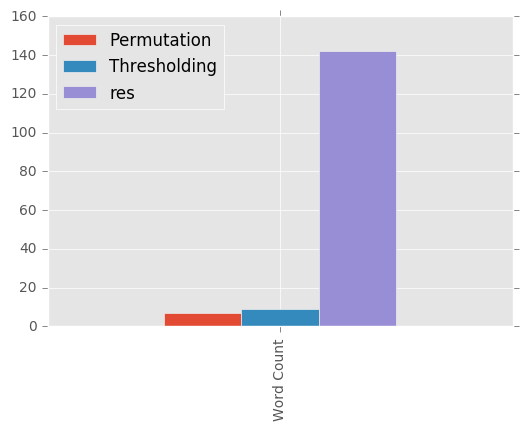

In [157]:
df_comdic.plot(kind='bar', stacked=False)

### Pragraph Topic

In [171]:
def paragraph_topic(topic_name,path_database,tablename):
    df=read_cvs_by_pands(path_database,tablename,index_col=0,header=0)
    df2=pd.DataFrame(df[df[topic_name]!=0][topic_name],columns=[topic_name])
    #print('Shape is: ',df_T.shape)
    return df2#df[df[topic_name]!=0][topic_name]


In [182]:
#df_nmf_W_tfidf_lesk_normal_table=read_cvs_by_pands(path_database,nmf_W_tfidf_lesk_normal_table,index_col=0,header=0)
#df_nmf_W_tfidf_lesk_normal_table.T.sort([0], ascending=[False]).groupby(0).head(2).T.ix[0:0,0:5]
                                
df_W_res=paragraph_topic('communication.n.03',path_database,nmf_W_res_sem_sim_correlation_coefficient_table)
print('Pragraphs belong to topic: communication.n.03','\nMatrix: W_RES','\nShape is: ',df_W_res.shape)
df_W_res
    

Pragraphs belong to topic: communication.n.03 
Matrix: W_RES 
Shape is:  (3, 1)


,communication.n.03
2,0.0008
4,0.0211
5,0.0169


In [181]:
df_W_threshold=paragraph_topic('communication.n.03',path_database,nmf_W_res_sem_sim_threshold_correlation_coefficient_table)
print('Pragraphs belong to topic: communication.n.03','\nMatrix: W_threshold','\nShape is: ',df_W_res.shape)
df_W_threshold

Pragraphs belong to topic: communication.n.03 
Matrix: W_threshold 
Shape is:  (4, 1)


,communication.n.03
2,0.0036
3,0.0003
4,0.0237
5,0.0140


In [180]:
df_W_permutation=paragraph_topic('communication.n.03',path_database,nmf_W_res_sem_sim_permutaion_correlation_coefficient_table)
print('Pragraphs belong to topic: communication.n.03','\nMatrix: W_permutation','\nShape is: ',df_W_permutation.shape)
df_W_permutation

Pragraphs belong to topic: communication.n.03 
Matrix: W_permutation 
Shape is:  (7, 1)


,communication.n.03
0,0.0377
1,0.0253
2,0.0037
3,0.0091
4,0.0061
5,0.0135
6,0.0232


In [185]:
df_nmf_W_res_sem_sim_correlation_coefficient_table=read_cvs_by_pands(path_database,nmf_W_res_sem_sim_correlation_coefficient_table,index_col=0,header=0)
df_nmf_W_res_sem_sim_correlation_coefficient_table.T.sort([6], ascending=[False]).groupby(6).head(2).T.ix[0:0,0:5]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,method.n.01,science.n.01,software.n.01,probe.n.01,evaluation.n.02
0,0.0,0.487,0.0738,0.0,0.0


In [183]:
df_nmf_W_res_sem_sim_threshold_correlation_coefficient_table=read_cvs_by_pands(path_database,nmf_W_res_sem_sim_threshold_correlation_coefficient_table,index_col=0,header=0)
df_nmf_W_res_sem_sim_threshold_correlation_coefficient_table.T.sort([3], ascending=[False]).groupby(3).head(2).T.ix[0:0,0:5]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,inquiry.n.01,cognition.n.01,education.n.04,science.n.01,practice.n.04
0,0.0,0.1415,0.0,0.4865,0.0


In [188]:
df_nmf_W_res_sem_sim_permutaion_correlation_coefficient_table=read_cvs_by_pands(path_database,nmf_W_res_sem_sim_permutaion_correlation_coefficient_table,index_col=0,header=0)
df_nmf_W_res_sem_sim_permutaion_correlation_coefficient_table.T.convert_objects(convert_numeric=True).sort_values(by=[0], ascending=[False]).groupby(0).head(5).T.ix[0:0,0:5]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,student.n.01,purgative.n.01,programmer.n.01,hired_hand.n.01,broad.n.01
0,7.557977e+12,6.291498e+12,4.039204e+12,1.716921e+12,1.479520e+12


### TF-IDF Topic

In [194]:
df_tfidf=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)
df_tfidf_communication=pd.DataFrame(df_tfidf[df_tfidf['communication.n.03']!=0]['communication.n.03'],columns=['communication.n.03'])
print('Term(Word-Doc:TF-IDF: communication.n.03','\nMatrix: tfidf','\nShape is: ',df_tfidf_communication.shape)
df_tfidf_communication

Term(Word-Doc:TF-IDF: communication.n.03 
Matrix: tfidf 
Shape is:  (3, 1)


,communication.n.03
2,0.062454
4,0.159472
5,0.103511


In [195]:
df_tfidf=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)
df_tfidf_footing=pd.DataFrame(df_tfidf[df_tfidf['footing.n.02']!=0]['footing.n.02'],columns=['footing.n.02'])
print('Term(Word-Doc:TF-IDF: footing.n.02','\nMatrix: tf-idf','\nShape is: ',df_tfidf_footing.shape)
df_tfidf_footing

Term(Word-Doc:TF-IDF: footing.n.02 
Matrix: tf-idf 
Shape is:  (1, 1)


,footing.n.02
2,0.088022


In [196]:
df_tfidf=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)
df_tfidf_implication=pd.DataFrame(df_tfidf[df_tfidf['implication.n.04']!=0]['implication.n.04'],columns=['implication.n.04'])
print('Term(Word-Doc:TF-IDF: implication.n.04','\nMatrix: tf-idf','\nShape is: ',df_tfidf_implication.shape)
df_tfidf_implication

Term(Word-Doc:TF-IDF: implication.n.04 
Matrix: tf-idf 
Shape is:  (1, 1)


,implication.n.04
2,0.088022


In [197]:
df_tfidf=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)
df_tfidf_intensifier=pd.DataFrame(df_tfidf[df_tfidf['intensifier.n.01']!=0]['intensifier.n.01'],columns=['intensifier.n.01'])
print('Term(Word-Doc:TF-IDF: intensifier.n.01','\nMatrix: tf-idf','\nShape is: ',df_tfidf_intensifier.shape)
df_tfidf_intensifier

Term(Word-Doc:TF-IDF: intensifier.n.01 
Matrix: tf-idf 
Shape is:  (1, 1)


,intensifier.n.01
0,0.076598


In [199]:
df_tfidf=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)
df_tfidf_terminology=pd.DataFrame(df_tfidf[df_tfidf['terminology.n.01']!=0]['terminology.n.01'],columns=['terminology.n.01'])
print('Term(Word-Doc:TF-IDF: terminology.n.01','\nMatrix: tf-idf','\nShape is: ',df_tfidf_terminology.shape)
df_tfidf_terminology

Term(Word-Doc:TF-IDF: terminology.n.01 
Matrix: tf-idf 
Shape is:  (3, 1)


,terminology.n.01
2,0.062454
3,0.113707
5,0.207022


In [200]:
df_tfidf=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)
df_tfidf_tilt=pd.DataFrame(df_tfidf[df_tfidf['tilt.n.04']!=0]['tilt.n.04'],columns=['tilt.n.04'])
print('Term(Word-Doc:TF-IDF: tilt.n.04','\nMatrix: tf-idf','\nShape is: ',df_tfidf_tilt.shape)
df_tfidf_tilt

Term(Word-Doc:TF-IDF: tilt.n.04 
Matrix: tf-idf 
Shape is:  (1, 1)


,tilt.n.04
2,0.088022


In [201]:
df_tfidf=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)
df_tfidf_way=pd.DataFrame(df_tfidf[df_tfidf['way.n.12']!=0]['way.n.12'],columns=['way.n.12'])
print('Term(Word-Doc:TF-IDF: way.n.12','\nMatrix: tf-idf','\nShape is: ',df_tfidf_way.shape)
df_tfidf_way

Term(Word-Doc:TF-IDF: way.n.12 
Matrix: tf-idf 
Shape is:  (1, 1)


,way.n.12
6,0.134968


# Add pragraphs to Quee

In [ ]:
q = tf.FIFOQueue(capacity=10, dtypes=[tf.string], shapes=[()])
paragraphs_instance = tf.placeholder(tf.string)

enqueue_many = q.enqueue([paragraphs_instance])
#enqueue = q.enqueue([paragraphs_instance])
with tf.Session("grpc://localhost:2222") as sess:
    with tf.device("/job:worker/task:0/cpu:1"):
        #sess.run(tf.initialize_all_variables)
        paragraphs=read_text_from_database(path_database,paragraph_table)
        #rr=sess.run(read_text_from_database)
        print(paragraphs)
        sess.run(enqueue_many,feed_dict={paragraphs_instance: paragraphs})
        close_filename_queue = q.close()
    
    
print(paragraphs_instance)

In [ ]:
dequeue = q.dequeue()
with tf.Session("grpc://localhost:2222") as sess:
    with tf.device("/job:worker/task:1/cpu:1")
        print(sess.run(dequeue)) # [1., 2.]
        print(sess.run(dequeue)) # [3., 4.]
        print(sess.run(dequeue)) # [5., 6.]

In [ ]:
with tf.Session() as sess:
    #print(read_file(new_path))
    #print(txt_pragraphs(read_file(new_path))[0])
    #read_text_from_database()
    print(sess.run(queue_paragraph))
    

In [1]:
print(c)

NameError: name 'c' is not defined

In [2]:
from nltk.corpus import wordnet as wn
import networkx as nx

def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name)
            for s1 in fn(s):
                graph.add_node(s1.name)
                graph.add_edge(s.name, s1.name)
                recurse(s1)

    recurse(synset)
    return graph


In [6]:
dog = wn.synset('dog.n.01')

graph = closure_graph(dog,lambda s: s.hypernyms())
nx.draw_graphviz(graph)


AttributeError: module 'networkx.drawing' has no attribute 'graphviz_layout'

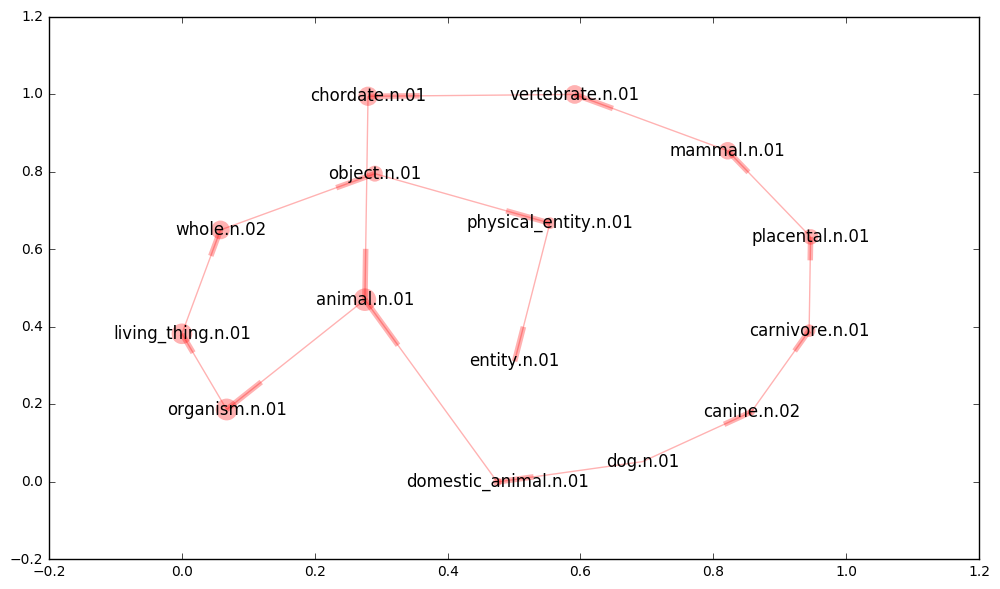

In [4]:
from nltk.corpus import wordnet as wn
import networkx as nx
import matplotlib.pyplot as plt

def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name())
            for s1 in fn(s):
                graph.add_node(s1.name())
                graph.add_edge(s.name(), s1.name())
                recurse(s1)

    recurse(synset)
    return graph


dog = wn.synsets('dog')[0]
G = closure_graph(dog,
                      lambda s: s.hypernyms())
index = nx.betweenness_centrality(G)
plt.rc('figure', figsize=(12, 7))
node_size = [index[n]*1000 for n in G]
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=node_size, edge_color='r', alpha=.3, linewidths=0)
plt.show()

